In [35]:
import csv
import pandas as pd
import dateutil.parser
import math
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib notebook

In [36]:
def plot_Enedis_Linky(Data_to_plot):
    df_data = pd.read_csv(Data_to_plot,sep=';')
    date = df_data['Horodate']
    courbe_charge = df_data['Valeur']

    datetimeconc=[]
    for i in range(date.size):
     eachdate=dateutil.parser.parse(date[i])
     datetimeconc.append(eachdate)

    somme_kWh=0
    pas_temps=0.5
    for i in range(courbe_charge.size):
    # onteste si le pas est 15 min, 30 min ou 1h, sauf pour le dernier pas
        if i<(courbe_charge.size-1):
            minute_current=datetimeconc[i].minute
            minute_next=datetimeconc[i+1].minute
            pas_temps_min=minute_next-minute_current
        if math.isnan(courbe_charge[i])==False:
            if pas_temps_min==0:
                somme_kWh=somme_kWh+courbe_charge[i]
            if (abs(pas_temps_min)==15 or abs(pas_temps_min)==45):
                somme_kWh=somme_kWh+courbe_charge[i]*0.25
            if abs(pas_temps_min)==30:
                 somme_kWh=somme_kWh+courbe_charge[i]*0.5
    print("La somme des kWh est ",somme_kWh/1000," kWh")
    
    fig, ax = plt.subplots()
    ax.stackplot(datetimeconc, courbe_charge, labels=['ENEDIS-Linky'])
    ax.xaxis.set_major_formatter(DateFormatter("%H:%M %b %d %Y "))
    fig.autofmt_xdate()
    plt.grid(True)
    plt.autoscale()
    plt.legend()
    plt.show()

La somme des kWh est  706.642  kWh


<IPython.core.display.Javascript object>


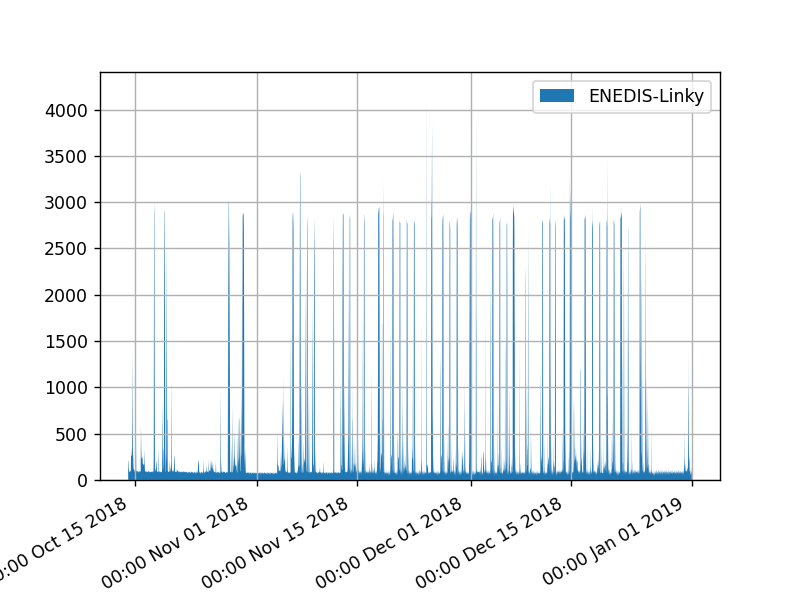

In [37]:
plot_Enedis_Linky("Data/01-Enedis-Linky/Enedis-Linky-2018.csv")

La somme des kWh est  3599.09  kWh


<IPython.core.display.Javascript object>


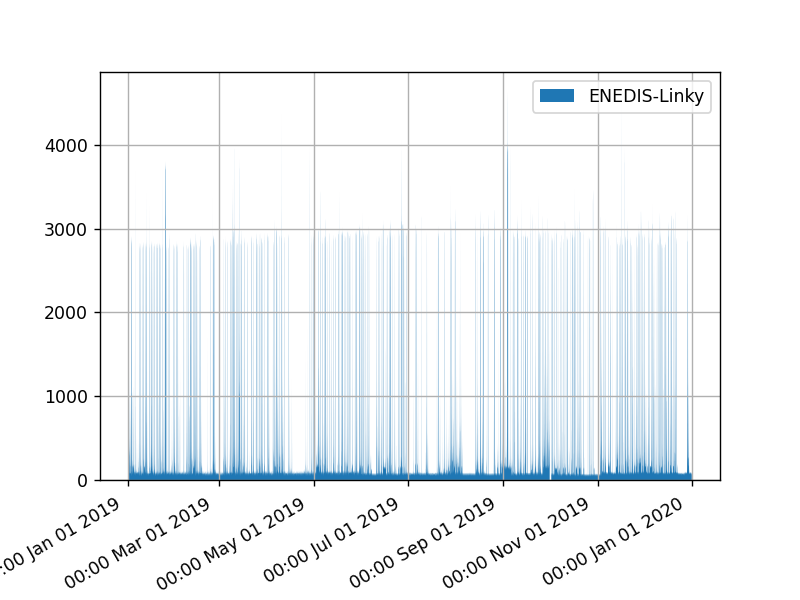

In [38]:
plot_Enedis_Linky("Data/01-Enedis-Linky/Enedis-Linky-2019.csv")

La somme des kWh est  4239.454  kWh


<IPython.core.display.Javascript object>


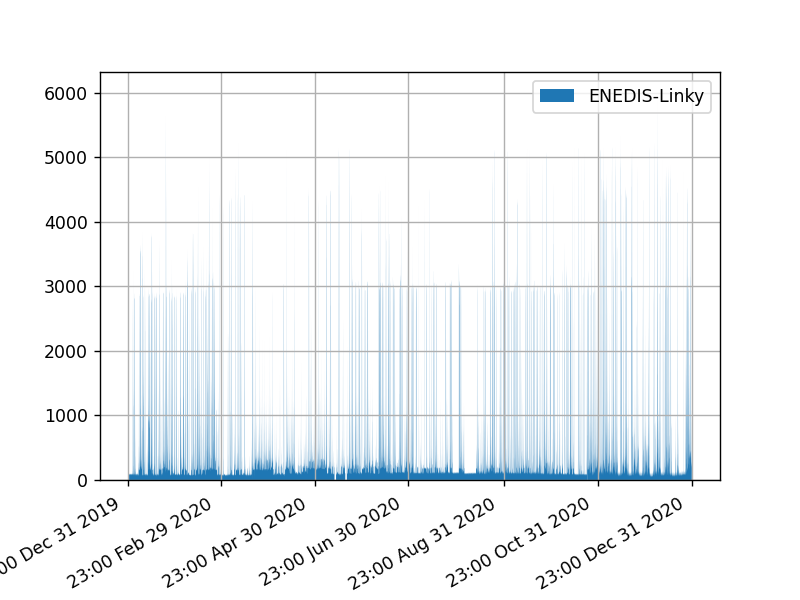

In [39]:
plot_Enedis_Linky("Data/01-Enedis-Linky/Enedis-Linky-2020.csv")

La somme des kWh est  3299.6335  kWh


<IPython.core.display.Javascript object>


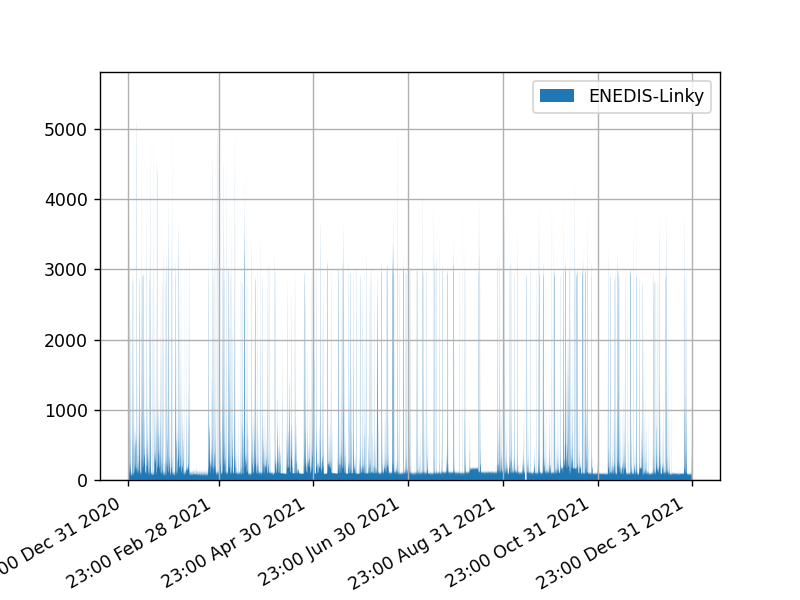

In [40]:
plot_Enedis_Linky("Data/01-Enedis-Linky/Enedis-Linky-2021.csv")

La somme des kWh est  2870.0205  kWh


<IPython.core.display.Javascript object>


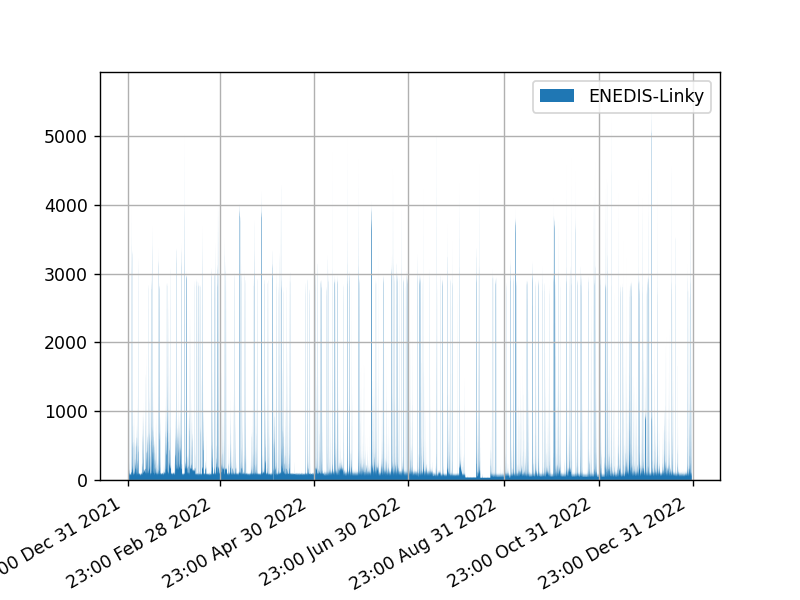

In [41]:
plot_Enedis_Linky("Data/01-Enedis-Linky/Enedis-Linky-2022.csv")